## Reading passwords from a file
You are now going to start working with a tiny part of the actual password dataset. Whenever there is data saved in files, you need a way to load the data into your programming environment. In this case you have a plain text file with the first 100 passwords from the large dataset. You can open the file in a new tab to check (and edit) its content. Make sure to save the file after you changed something (and you want to keep those changes).  

With the following code snippet you can open a file called `some_file.txt`, print the first line from the file, and close it again:
```python
with open("some_file.txt") as f:
    print(f.readline())
```
The method `f.readline()` returns the current line as a string and moves the file (with the name `f`) to the next line. If you call the method for a second time, you will get the second line from the file etc... You can call the method `f.readline()` as often as you want, but the returned strings will be empty if you have reached the end of the file.  

It is a convention (again) to name the file `f`. If you want to change the name, you also have to use the new name in the indented block of the `with` statement.

- Print the first 10 passwords from the file `100.txt`. Open the file in a new tab and compare the printed output to the first 10 lines.
- The method `f.readlines()` reads the entire file `f` at once and returns a list of the individual lines. Assign the list to a new variable and check that its length matches the length of the file.
- Take a closer look at a few passwords in the list and calculate their lengths. Is there anything "wrong" with the data in the list compared to the passwords in the file?

In [1]:
# the passwords match the file content but there are empty lines printed after the passwords
with open("100.txt") as f:
    # count to 10 with the for loop
    for i in range(10):
        print(f.readline())

lfc

LFL870206

123abc

123abc@

teh-cnt

sweet1

hfrtnxbr

25bush

5172980a

north33



In [2]:
# store the entire file in the 'passwords' list
with open("100.txt") as f:
    passwords = f.readlines()
len(passwords)

100

In [3]:
# there is the character "\n" at the end of the passwords, this causes the length to be off by 1
i = 5
passwords[i], len(passwords[i])

('sweet1\n', 7)

## Preprocessing the file data
The reason why the password data was "wrong" in the last section was the newline character `"\n"` at the end of the strings. Since there is not a good reason for a password to ever contain a newline character, the best approach is to remove it from the passwords before storing them in a list. If you want to remove the newline character `"\n"` from each line of the file, you can use the method `line.strip()` (use the name of your string variable in place of `line`).
 
- Print the first 10 passwords from the file again and remove the newline characters. The empty line after each password should be gone now.
- Create an empty list, open the file `100.txt` and iterate over the list returned from `f.readlines()`. Strip the newline character from each line before appending it to the empty list.
- Check the lengths of a few passwords again to confirm that the data in the list is correct now.
- EXTRA: Load all passwords from the file `100.txt` again and strip them in a list comprehension. The cell should have no more than two lines of code (commented lines `#` do not count).

In [4]:
# you can call the method strip() directly on each string returned by f.readline()
with open("100.txt") as f:
    for i in range(10):
        print(f.readline().strip())

lfc
LFL870206
123abc
123abc@
teh-cnt
sweet1
hfrtnxbr
25bush
5172980a
north33


In [5]:
# create an empty list
passwords = []
with open("100.txt") as f:
    # instead of getting printed, the lines are appended to the list of passwords
    for line in f.readlines():
        passwords.append(line.strip())

In [6]:
# the newline character "\n" is gone now and the length is correct
i = 99
passwords[i], len(passwords[i])

('fffff', 5)

In [7]:
with open("100.txt") as f:
    passwords = [line.strip() for line in f.readlines()]

## Filtering the file data
When you open the text file in a new tab, you can see that a few lines are empty (or look empty at least). If there are no characters left in a password after you have removed the newline character and whitespace characters, you do not want to keep the password since an empty string cannot be a valid password. If you have a string variable named `s`, there are two ways to check if it is empty:
```python
if s == "":
    print("The string is empty")

if not s:
    print("The string is still empty")
```
The first option is quite intuitive. The string variable `s` is compared to an empty string with the operator `==` and the condition is `True` if the string is actually empty. The second option looks a bit weird at first sight, but this is the "pythonic" way of checking if a string is empty since it is then considered to be `False` in a boolean context. With the keyword `not` this condition is then negated to be `True` for empty strings. Instead of using an `if` statement, you can also pass any variable to the built-in function `bool()` to check its boolean value.

- When would you expect a list to equate to `False`? Check if your hypothesis is true. What is the boolean value of the list `[False, False]`? Does the same approach work for dictionaries?
- Numbers are also considered to be either `True` or `False`. There is only a single number that equates to `False`, can you find out which one it is?
- Create an empty lists for the passwords, and iterate over all lines in the file `100.txt` again. Strip each line during the iteration but only append it to the new list if the line is not empty.
- Check the length of the new list of passwords to see how many passwords were filtered out. Take a look at the file again to see if this number is correct.
- EXTRA: Load the passwords from the file `100.txt` and filter them with a list comprehension. Why could this be considered as "inefficient" compared to the regular loop?

In [8]:
# only an empty list is considered False, similar to the empty string 
l = []
bool(l)

False

In [9]:
# the list is equal to True since it is not empty, it does not matter what the values of the list elements are
l = [False, False]
bool(l)

True

In [10]:
# dictionaries work just like lists, they are only False if they are completely empty
d = {"a":1, "b":2, "c":3}
bool(d)

True

In [11]:
# only the number 0 equates to False, every other number is considered to be True
n = 7
bool(n)

True

In [12]:
passwords = []
with open("100.txt") as f:
    for line in f.readlines():
        # keep the stripped line in a variable ...
        password = line.strip()
        # ... but only append it to the list if it is not empty
        if password:
            passwords.append(password)

In [13]:
# there are 97 passwords in the list, which agrees with the three empty lines in the data file
len(passwords)

97

In [14]:
# each (non-empty) line has to be stripped twice
with open("100.txt") as f:
    passwords = [line.strip() for line in f.readlines() if line.strip()]

## First password statistics
With the preprocessed and filtered list of passwords you can now start to evaluate the data. As for the single password, the first value you have to compute is the length of each password. While the computation is simple thanks to the built-in function `len()`, the length data will be very important to filter and group the password data during the further analysis.

- Store the lengths of the passwords in a new list. You can use a regular `for` loop or a list comprehension to iterate over the passwords.
- Compute the average length of the passwords using built-in functions that you already know (no `for` loops are required here). Assign the result to a variable for later use.
- What is the type of the average length of the passwords? You can pass any variable to the built-in function `type()` to check its type.
- Compute the [(population) variance](https://en.wikipedia.org/wiki/Variance#Population_variance) of the password lengths. Use a list comprehension if possible. You can square a numeric variable named `x` using the expression `x**2`.
- Take the square root of the population variance to compute the standard deviation of the password lengths. Instead of the operator `**` you can also use the built-in function `pow()`.

In [15]:
# regular for loop
password_lengths = []
for password in passwords:
    password_lengths.append(len(password))

In [16]:
# list comprehension
password_lengths = [len(password) for password in passwords]

In [17]:
# the sum of all lengths divided by the number of lengths is the average length
length_average = sum(password_lengths) / len(password_lengths)
length_average

7.845360824742268

In [18]:
# the length_average is of type float which corresponds to a real number from mathematics
type(length_average)

float

In [19]:
# the population variance is calculated from the average squared deviation from the average length
length_variance = sum([(length - length_average)**2 for length in password_lengths]) / len(password_lengths)
length_variance

3.161653735784886

In [20]:
# you can take the square root by using the exponent 1/2 or 0.5
length_variance**(1/2), length_variance**0.5, pow(length_variance, 0.5)

(1.778103972152609, 1.778103972152609, 1.778103972152609)

## Using arrays for numerical data
In principle you could continue to use lists to store any kind of data related to the passwords. There are no restrictions on the type of the items stored in the list and you can even modify or slice the lists if you only want to work with a subset of the passwords. The downside is that lists are very limited when it comes to mathematical operations. As you could see during the last exercise, something as simple as computing the mean value is not directly implemented as a function or method. And the computation of the population variance even requires an iteration over the entire list.  

To overcome this limitation of native Python lists, the package [NumPy](https://numpy.org/) provides so-called arrays that are designed to store homogeneous (and multi-dimensional) numerical data and to run (mathematical) operations on the data. To use the package you have to import it with the `import` statement:
```python
import numpy as np
```
Instead of just using `import numpy` it is convention to import it with the abbreviation `np`. You now have access to the entire NumPy package with the prefix `np.`.  

- Import the NumPy package to your notebook. Write `np.` in a new cell and press tab to see all available functions etc... Try the autocompletion by typing some random letter(s).
- Convert the list of password lengths to a NumPy array by passing it to `np.array()`. Use a different variable name for the array, since the list will otherwise be overwritten.
- The array can be sliced and printed just like the list. Look at a few individual passwords and a few index ranges in the array and the list. Can you raise an `IndexError` with the array?
- You can access the shape of an array variable `a` with the attribute `a.shape`. How does the output differ from the `len()` of a list or an array? Can you think of a reason for this difference?
- EXTRA: The type of the data in the array is saved in the attribute `a.dtype`. Check the data type of the array of lengths and find out what it means.
- EXTRA: You can pass the data type of the lengths array to `np.iinfo()` to get some more information. What happens if you try to assign a value outside of the allowed range to the array?

In [21]:
import numpy as np

In [ ]:
# the autocompletion will show all function etc. that are available in the NumPy package
np.

In [23]:
# call the array "lengths" to keep the initial list of password lengths
lengths = np.array(password_lengths)

In [24]:
# all the indexing of lists also works for the array
lengths[9], lengths[-1], lengths[10:20]

(7, 5, array([ 6,  8,  7,  8, 10,  7, 12, 10,  8,  8]))

In [25]:
# the IndexError even tells you the size of the array (along the selected axis)
lengths[137]

IndexError: index 137 is out of bounds for axis 0 with size 97

In [26]:
# the shape is always a tuple since NumPy arrays can be multi-dimensional
lengths.shape

(97,)

In [27]:
# the length of the array always returns the size of the first axis
len(lengths)

97

In [28]:
# the data type is a 64 bit (signed) integer
lengths.dtype

dtype('int64')

In [29]:
# the np.iinfo() reveals the minimum and maximum allowed values of the data type
np.iinfo(lengths.dtype)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [30]:
# an OverflowError is raised when you try to assign a value smaller/greater than the minimum/maximum allowed value
lengths[0] = 9223372036854775808

OverflowError: Python int too large to convert to C long

## EXTRA: Finding the best data type
While NumPy arrays are already optimized to store numerical data, you can still do a lot of additional optimization manually. When you pass the list of password lengths to `np.array()`, an array with the dtype `np.int64` is returned. NumPy is able to correctly pick an integer data type since there are only integers in the list of lengths. However, NumPy will always pick the most general data type that correctly represents the data. Since the array will only contain lengths of passwords, we can further restrict the data type by specifying a data type when creating the array. Alternative you can get a copy of an existing array `a` with a different data type using the method `a.astype()`.  

Disclaimer: For not even 100 passwords this optimization is not really appropriate yet. However, if you are working on millions of passwords, this optimization will save you a lot of memory.

- Specify the requirements for the optimal data type of an array to store password lengths.
- Check the available integer data types provided by NumPy. Which one is the best match for the specified requirements?
- Create a new array from the lists or create a copy of the existing array using the new data type you picked.
- Use the array attributes `size` and `itemsize` to compute the memory size of both arrays. How much memory did you save with the new data type?
- Store the maximum allowed integer for the type `np.int64` in the variable `n_max`. Create an array using `np.array([n_max])` and check the data type. How does the data type of the array change if you use `n_max + 1` or `n_max * 10` instead?

In [31]:
# the password lengths will never be negative which allows you to use an unsigned integer type
# using a limit of 255 characters is reasonable for passwords, the corresponding data type would be np.uint8
# with the data type np.uint16 the maximum length would be 65535 which will definitely be enough

In [32]:
# use the dtype np.uint8 which only allows values in the range [0, 255]
lengths_uint8 = np.array(password_lengths, np.uint8)

In [33]:
# compare the size and the itemsize to the original array
lengths.size, lengths.itemsize, lengths_uint8.size, lengths_uint8.itemsize

(97, 8, 97, 1)

In [34]:
# the array with the new data type uses 8x less memory
memory_size = lengths.size * lengths.itemsize
memory_size_uint8 = lengths_uint8.size * lengths_uint8.itemsize
memory_size, memory_size_uint8, memory_size / memory_size_uint8

(776, 97, 8.0)

In [35]:
# get the maximum allowed value from np.iinfo()
n_max = np.iinfo(np.int64).max

In [36]:
# with just n_max the array will have the data type np.int64
np.array([n_max]).dtype

dtype('int64')

In [37]:
# with n_max + 1 the data type will be 'uint64' (unsigned 64 bit integer) which has a greater maximum value
np.array([n_max + 1]).dtype

dtype('uint64')

In [38]:
# with n_max * 10 the data type will be 'O' (object) since there is no larger integer data type available in NumPy
np.array([n_max * 10]).dtype

dtype('O')

## Basic array computations
Since NumPy arrays are optimized for the handling of numerical data, they already offer a wide range of computations. You can directly use the arithmetic operators `+`, `-`, `*`, `/` and `**` with NumPy arrays, and there are quite a few methods/functions implemented to run computations on single arrays. The most common ones are `sum()`, `mean()`, `std()`, `max()` and `min()`. You can either use them as methods of an array or as functions from the NumPy package. See the following code snippets for the two options to compute the sum of an array  named `a`:
```python
a.sum()
np.sum(a)
```
Which option you use is mainly a matter of preference. Most computations are implemented as functions and array methods, but less common computations might only be implemented as a function. In any case, you should avoid mixing the two options all the time since this can make your code more difficult to read/understand. Especially if you use different options for the same computation.  

Some of the computational methods/functions are also implemented by built-in functions (e.g. `sum()` or `abs()`), but their NumPy equivalents will be much faster (easily up to 100x). You will not be able notice the runtime difference for ~100 passwords, but with larger datasets this becomes very relevant. And since there is no downside to using NumPy when you are dealing with numerical data, you should use it even for small amounts of data.

- Try the operators `+`, `-`, `*`, `/` and `**` with the array of lengths and the number 3. How is each operator applied to the array and the scalar value?
- What happens when you try to multiply the list of passwords with the number 3? Why is it not possible to divide the list by 3?
- Use the computational methods/functions introduced in this exercise on the array of lengths. Check that the mean value and the standard deviation match the results you manually calculated from the list earlier.
- EXTRA: Try two more computational methods/functions with the array of lengths. If you don't know where to start, you can type `lengths.` (use your array name here) in a cell and use tab completion to show you the available methods, or you can check the [NumPy user guide](https://numpy.org/doc/stable/user/quickstart.html#functions-and-methods-overview) for some inspiration. If you already have something in mind, you can also look online to find out if there is an implementation in the NumPy package.

In [39]:
# the operator is applied to every item in the array individually
lengths - 3, lengths * 3

(array([ 0,  6,  3,  4,  4,  3,  5,  3,  5,  4,  3,  5,  4,  5,  7,  4,  9,
         7,  5,  5,  2,  4,  5,  5,  5,  5,  3,  8,  4,  7,  4, 10,  7,  6,
         3,  3,  5,  5,  7,  5,  5,  5,  5,  3, 10,  3,  6,  5,  4,  8,  7,
         6,  5,  7,  3,  4,  6,  6,  6,  3,  4,  4,  3,  6,  7,  1,  5,  6,
         4,  7,  6,  5,  4,  4,  3,  5,  5,  3,  4,  5,  6,  8,  5,  8,  4,
         4,  2,  3,  5,  6,  4,  5,  6,  2,  4,  4,  2]),
 array([ 9, 27, 18, 21, 21, 18, 24, 18, 24, 21, 18, 24, 21, 24, 30, 21, 36,
        30, 24, 24, 15, 21, 24, 24, 24, 24, 18, 33, 21, 30, 21, 39, 30, 27,
        18, 18, 24, 24, 30, 24, 24, 24, 24, 18, 39, 18, 27, 24, 21, 33, 30,
        27, 24, 30, 18, 21, 27, 27, 27, 18, 21, 21, 18, 27, 30, 12, 24, 27,
        21, 30, 27, 24, 21, 21, 18, 24, 24, 18, 21, 24, 27, 33, 24, 33, 21,
        21, 15, 18, 24, 27, 21, 24, 27, 15, 21, 21, 15]))

In [40]:
# the list is repeated three times instead of every item getting multiplied by 3
print(password_lengths * 3)

[3, 9, 6, 7, 7, 6, 8, 6, 8, 7, 6, 8, 7, 8, 10, 7, 12, 10, 8, 8, 5, 7, 8, 8, 8, 8, 6, 11, 7, 10, 7, 13, 10, 9, 6, 6, 8, 8, 10, 8, 8, 8, 8, 6, 13, 6, 9, 8, 7, 11, 10, 9, 8, 10, 6, 7, 9, 9, 9, 6, 7, 7, 6, 9, 10, 4, 8, 9, 7, 10, 9, 8, 7, 7, 6, 8, 8, 6, 7, 8, 9, 11, 8, 11, 7, 7, 5, 6, 8, 9, 7, 8, 9, 5, 7, 7, 5, 3, 9, 6, 7, 7, 6, 8, 6, 8, 7, 6, 8, 7, 8, 10, 7, 12, 10, 8, 8, 5, 7, 8, 8, 8, 8, 6, 11, 7, 10, 7, 13, 10, 9, 6, 6, 8, 8, 10, 8, 8, 8, 8, 6, 13, 6, 9, 8, 7, 11, 10, 9, 8, 10, 6, 7, 9, 9, 9, 6, 7, 7, 6, 9, 10, 4, 8, 9, 7, 10, 9, 8, 7, 7, 6, 8, 8, 6, 7, 8, 9, 11, 8, 11, 7, 7, 5, 6, 8, 9, 7, 8, 9, 5, 7, 7, 5, 3, 9, 6, 7, 7, 6, 8, 6, 8, 7, 6, 8, 7, 8, 10, 7, 12, 10, 8, 8, 5, 7, 8, 8, 8, 8, 6, 11, 7, 10, 7, 13, 10, 9, 6, 6, 8, 8, 10, 8, 8, 8, 8, 6, 13, 6, 9, 8, 7, 11, 10, 9, 8, 10, 6, 7, 9, 9, 9, 6, 7, 7, 6, 9, 10, 4, 8, 9, 7, 10, 9, 8, 7, 7, 6, 8, 8, 6, 7, 8, 9, 11, 8, 11, 7, 7, 5, 6, 8, 9, 7, 8, 9, 5, 7, 7, 5]


In [41]:
# division by 3 is not possible, you would have to slice the list
password_lengths / 3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [42]:
# the mean value and the standard deviation agree with the manually calculated values
np.sum(lengths), np.mean(lengths), np.std(lengths), np.max(lengths), np.min(lengths)

(761, 7.845360824742268, 1.7781039721526093, 13, 3)

In [43]:
# compute the variance of the lengths, which also matches the previously calculated value
np.var(lengths)

3.161653735784887

In [44]:
# find the median value of the lengths
np.median(lengths)

8.0

## Filtering data in NumPy arrays

In addition to the arithmetic operators you can also use the comparison operators `==`, `>`, `<=` etc. directly with NumPy arrays. If you want to compare an array to another array, they must have the same shape (or at least similar shapes), otherwise the comparison is not well defined. If you compare an array to a scalar value, the comparison is done element-wise. You can directly use the result of the comparison as an index of the array. This allows you to quickly filter data in NumPy arrays. See the following example that will return all lengths less than 5:
```python
lengths[lengths < 5]
```
The name of the array in this example is `lengths`. If you picked a different name for your array, you have to use that in place of `lengths`.

- Use the equality operator with the array of lengths and the number 7. What are the unique values in the resulting array? What is the type of the data in the resulting array?
- Get all lengths greater than 6 from the array and compute their average value. You should not need more than one line of code for this task.
- Count the number of passwords that have the median length. Can you find more than one way to do this? Hint: In Python `True + True` equals `2`.

In [45]:
# the comparison of the lengths to the number 7 returns an array with only True and False values
lengths == 7

array([False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True, False])

In [46]:
# the data type of the array is 'bool', which is short for 'boolean'
(lengths == 7).dtype

dtype('bool')

In [47]:
# directly index the lengths array with the result of the comparison
lengths[lengths > 6]

array([ 9,  7,  7,  8,  8,  7,  8,  7,  8, 10,  7, 12, 10,  8,  8,  7,  8,
        8,  8,  8, 11,  7, 10,  7, 13, 10,  9,  8,  8, 10,  8,  8,  8,  8,
       13,  9,  8,  7, 11, 10,  9,  8, 10,  7,  9,  9,  9,  7,  7,  9, 10,
        8,  9,  7, 10,  9,  8,  7,  7,  8,  8,  7,  8,  9, 11,  8, 11,  7,
        7,  8,  9,  7,  8,  9,  7,  7])

In [48]:
# compute the mean value of the filtered lengths
np.mean(lengths[lengths > 6])

8.473684210526315

In [49]:
# use the function np.median() which returns 8 (or rather 8.0)
median_length = np.median(lengths)
median_length

8.0

In [50]:
# compute the length of the filtered lengths
len(lengths[lengths == median_length])

26

In [51]:
# take the sum of the boolean array which effectively counts the True values
np.sum(lengths == median_length)

26

## A simple plot
The most popular Python package for plotting is [matplotlib](https://matplotlib.org/). You can do everything from a simple line plot to advanced groupplots, and the package works great together with NumPy. Instead of importing the entire package `matplotlib` it is usually sufficient if you import just `matplotlib.pyplot` since the most common functions are all implemented there. By convention you should rename the import to `plt`. You can then create a simple plot with the following function:
```python
plt.plot([x], y, [fmt])
```
where the square brackets indicate that both the `x` (values) and the `fmt` (format) are optional. If there is only one argument, it will be interpreted as the `y` (data). The format is a string that defines the shape of the markers, the line between the points and their color. By default, the plot will be a blue line without any markers. If you want to learn more about the parameters of the function `plt.plot()`, take a look at the docstring or the documentation at [https://matplotlib.org](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

- Import the module `matplotlib.pyplot` and rename it to `plt`. What happens when you call the function `plt.plot()` without any data/arguments?
- Compute the passsword length distribution with the function `np.bincount()`. If you do not understand the length distribution array, look at the examples in the docstring of the function.
- Pass the length distribution data to the function `plt.plot()`. If you don't like the solid line, look for other formats in the docstring/documentation.
- If you only passed the y-data to the plot function, why are the x-values correct anyway? What are the x-values when you plot the array of lengths instead of their distribution?

In [52]:
# import the module and rename it
import matplotlib.pyplot as plt

[]

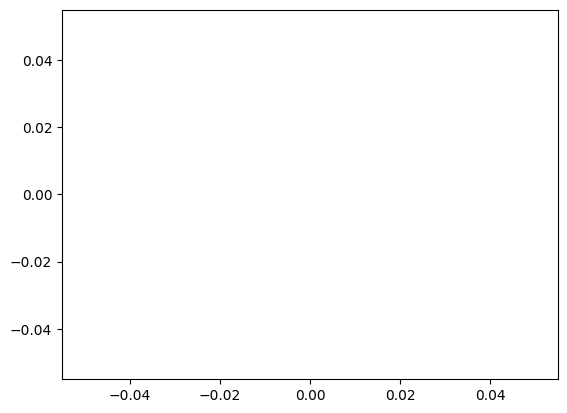

In [53]:
# an empty plot is created and displayed with both axes centered around 0
plt.plot()

In [54]:
# the lengths are binned from 0 to max(lengths)
length_counts = np.bincount(lengths)
length_counts

array([ 0,  0,  0,  1,  1,  4, 15, 21, 26, 13,  9,  4,  1,  2])

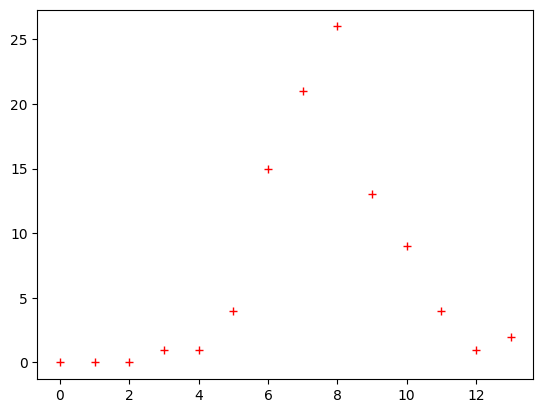

In [55]:
# use red plusses to plot the length distribution
plt.plot(length_counts, "r+")

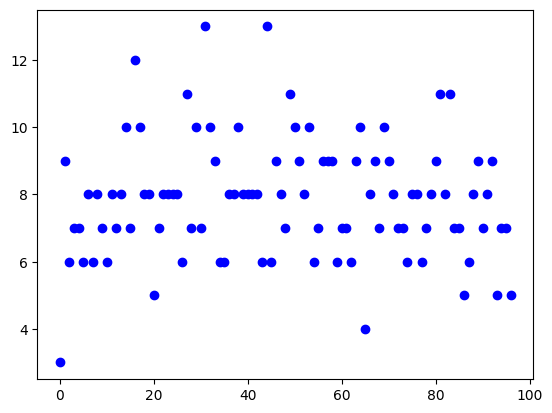

In [56]:
# by default the x-values will go from 0 to len(y) - 1, this just happens to be correct for the result of np.bincount()
# if you just plot the lengths, they will be shown in the order of the passwords in the file '100.txt' and the x-values will go from 0 to 96
plt.plot(lengths, "bo")

## Improving the first plot
If you want to display the length distribution of the passwords, a histogram would be much better suited than the simple plot from the previous exercise. In matplotlib you can do this with the function `plt.bar()`. Compared to `plt.plot()` this function requires both the x-values and the y-data (height) to display anything.

- Look at the docstring or the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) of the function `plt.bar()`. Can you understand that both the x-values and the y-data (called height) are required?
- Get the length distribution data without the leading zeros. Try to find a general solution that works for any array of password lengths.
- Generate the x-values to accompany the histogram data. You can either pass the built-in `range()` to the function `np.array()` or you can use the function `np.arange()`.
- Create a bar plot using the x-values and the reduced histogram data. If a ValueError is raised due to a shape mismatch, one of the arrays probably has the wrong length.
- Add labels to the x-axis and the y-axis with the functions `plt.xlabel()` and `plt.ylabel()`. Also add a title with the function `plt.title()`.
- Change one property of the bars to further improve the plot (based on your personal preference). You can pick something from the docstring of `plt.bar()` or you can find something else online.

In [ ]:
# according to the function signature both x and height are required
plt.bar(

In [63]:
# slice the array returned by np.bincount() with the minimum length
length_counts = np.bincount(lengths)[np.min(lengths):]
length_counts

array([ 1,  1,  4, 15, 21, 26, 13,  9,  4,  1,  2])

In [64]:
# get the range from the minimum and maximum lengths
x = np.array(range(np.min(lengths), np.max(lengths)+1))
x = np.arange(np.min(lengths), np.max(lengths)+1)

In [65]:
# check that the two arrays have the same shapes
length_counts, x

(array([ 1,  1,  4, 15, 21, 26, 13,  9,  4,  1,  2]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

Text(0.5, 1.0, 'Length distribution of 97 passwords')

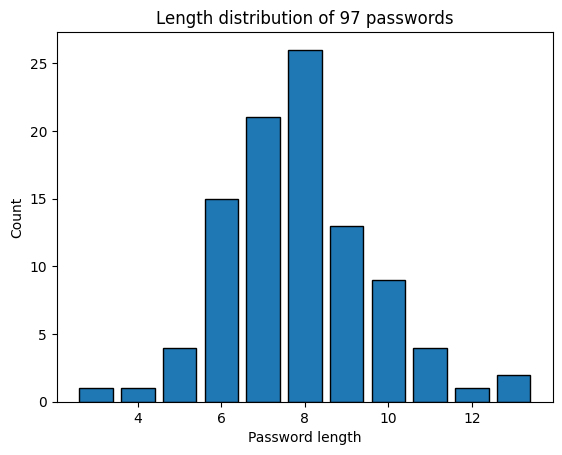

In [66]:
# plot the length distribution as bars with black edges
plt.bar(x, length_counts, edgecolor="k")
# label the x-axis and the y-axis with a string
plt.xlabel("Password length")
plt.ylabel("Count")
# set the title to a string
plt.title("Length distribution of 97 passwords")

## Readable and reusable code with functions
So far you have directly written and executed your code in the cells, which is one of the big advantages of the Jupyter environment. This was a perfectly fine approach since most of the tasks required just a few lines of code and you never had to use more than one for-loop. Wrapping a task in a function makes sense as soon you have to repeat the task many times. So far all the required computational tasks were already implemented in native Python functions (e.g. `len()` or `sum()`) and in the NumPy package (e.g. `np.mean()` or `np.std()`).  
If you want to compute the digit sums of all passwords, there is no function available in native Python or NumPy. Implementing the computation of the digit sum in a function will therefore make your code a lot more readable and reusable. You can just call `compute_digit_sum(password)` for every password in the dataset and you do not have to recall the implementation of the computation of the digit sum every time.  
The simplest function only requires a name and one indented line of code. In most cases you also want the function to accept parameters and to return one value (or multiple values). You can use the following template to write your own function for the computation of the sum of digits:
```python
def compute_digit_sum(password):
    digit_sum = 
    
    return digit_sum
```
The parameter is called `password` and it is only defined in the scope of the function (indicated by the indentation). The keyword `return` is followed by the computed digit sum that you want to return from the function.

- Recall how the computation of the sum of digits worked. You can either copy the cell from the previous notebook or you can rewrite the computation.
- Implement the computation as a function. You can use the template above or you can write the function from scratch.
- Compute the sum of digits for all the passwords and store the result in a NumPy array. You can store it in a list first, but the final result must be a NumPy array.
- Display the digit sum data in a new plot. What would be suitable data to use for the x-values? Label the axes, give the plot a title and modify a few plot properties to your liking.
- EXTRA: If you are curious, you can try to write the computation of the sum of digits for all passwords without a function. Do you agree that using the function increases the readability?

In [67]:
# computation of the digit sum with a line comprehension
password = "123456"
sum([int(c) for c in password if c.isnumeric()])

21

In [68]:
# function implementation with a regular for-loop
def compute_digit_sum(password):
    digit_sum = 0
    for char in password:
        if char.isnumeric():
            digit_sum += int(char)
    return digit_sum

In [69]:
# the function implementation with a list comprehension allows you to directly return the result
def compute_digit_sum(password):
    return sum([int(c) for c in password if c.isnumeric()])

In [70]:
# start from an empty list and iterate over the passwords to append the digit sums
digit_sums = []
for password in passwords:
    digit_sums.append(compute_digit_sum(password))
digit_sums = np.array(digit_sums)

In [71]:
# use a list comprehesion and directly pass the list to an array
digit_sums = np.array([compute_digit_sum(password) for password in passwords])

Text(0.5, 1.0, 'Computation of the digit sum of 97 passwords')

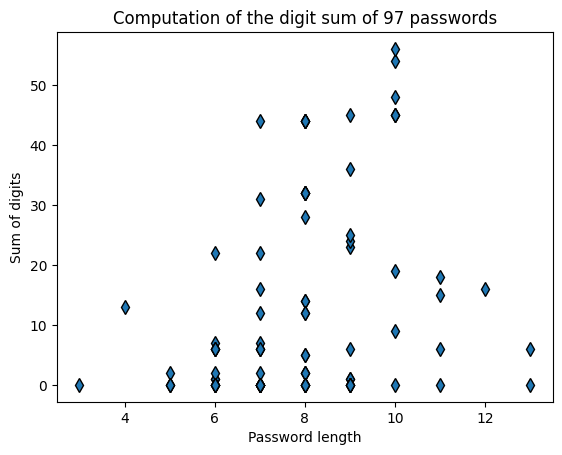

In [72]:
# plot the digit sum as a function of the length, use diamond-shaped markers with a black edge
plt.plot(lengths, digit_sums, "d", markersize=7, markeredgewidth=1, markeredgecolor="k")
# label the two axes based on the data
plt.xlabel("Password length")
plt.ylabel("Sum of digits")
# describe the plot in the title
plt.title("Computation of the digit sum of 97 passwords")

In [73]:
# compute the digit sums without a function using regular for loops
digit_sums = []
for password in passwords:
    digit_sum = 0
    for c in password:
        if c.isnumeric():
            digit_sum += int(c)
    digit_sums.append(digit_sum)
np.array(digit_sums)

array([ 0, 23,  6,  6,  0,  1,  0,  7, 32,  6,  1,  2,  7, 14,  0, 12, 16,
       45,  2, 44,  2, 44, 44, 44, 44, 44,  6, 15,  0, 45, 22,  6, 48,  1,
        6,  0, 28,  0, 54, 32, 32, 32, 32,  0,  0, 22,  6, 14,  6,  6, 45,
        1,  2, 19,  6,  0, 45, 24, 36,  0, 31, 16,  0,  0,  9, 13,  0,  0,
        0, 56,  0,  5,  0,  0,  0,  5,  0,  2,  0,  0,  0, 18,  0,  0,  0,
        2,  0,  0, 12,  0,  0, 12, 25,  0,  0,  0,  0])

In [74]:
# compute the digit sums without a function using list comprehensions
np.array([sum([int(c) for c in password if c.isnumeric()]) for password in passwords])

array([ 0, 23,  6,  6,  0,  1,  0,  7, 32,  6,  1,  2,  7, 14,  0, 12, 16,
       45,  2, 44,  2, 44, 44, 44, 44, 44,  6, 15,  0, 45, 22,  6, 48,  1,
        6,  0, 28,  0, 54, 32, 32, 32, 32,  0,  0, 22,  6, 14,  6,  6, 45,
        1,  2, 19,  6,  0, 45, 24, 36,  0, 31, 16,  0,  0,  9, 13,  0,  0,
        0, 56,  0,  5,  0,  0,  0,  5,  0,  2,  0,  0,  0, 18,  0,  0,  0,
        2,  0,  0, 12,  0,  0, 12, 25,  0,  0,  0,  0])

## Labeling data in plots
When you have multiple lines and/or markers in a single plot, you want to label the data and display the labels in a legend. In matplotlib all the plot functions such as `plt.plot()`, `plt.bar()` etc. have the string parameter `label` that allows you to label the data. You can then add a legend to the plot where the markers/lines will be displayed along with their labels. See the following code snippet that creates a simple line plot with a label and a legend:
```python
plt.plot(-np.arange(10) / 2, "r-", label="something linear")
plt.legend()
```
All labels that are assigned in the same cell before calling `plt.legend()` will be included in the legend. You should therefore call `plt.legend()` at tne end of a cell in most cases. If you want to exclude something from the legend, just omit the parameter `label` in that function.  

To include some general information about the dataset in a label or a title, you can use string formatting to include variables in a string. The recommended way is to use so-called f-strings where the variables are just written directly in the string. As an example, consider a plot where the length distribution of the passwords with a digit sum lower than the value of the variable `max_digit_sum` is shown. You can then use the variable `max_digit_sum` to create the following title:
```python
plt.title(f"Length distribution of passwords with a digit sum lower than {max_digit_sum}")
```

- Create an f-string that presents a password from the dataset including all the properties of the password that you have computed in this notebook.
- Plot the digit sums as a function of the password length and label the axes accordingly. Use a reasonable format to display the data.
- Compute the maximum possible digit sum as a function of the password length and include this in the plot by calling `plt.plot()` again.
- Assign labels to all the data with the `label` parameter and add a legend to the plot. How can you change the position of the legend in the plot?
- Add a title to the plot that includes the number of passwords in the dataset. The title should still be correct if you run the entire notebook with a different dataset.

In [75]:
# define an index to select a passowrd and read the corresponding length and digit sum
i = 40
f"The password '{passwords[i]}' has the length {lengths[i]} and the digit sum {digit_sums[i]}"

"The password '10261994' has the length 8 and the digit sum 32"

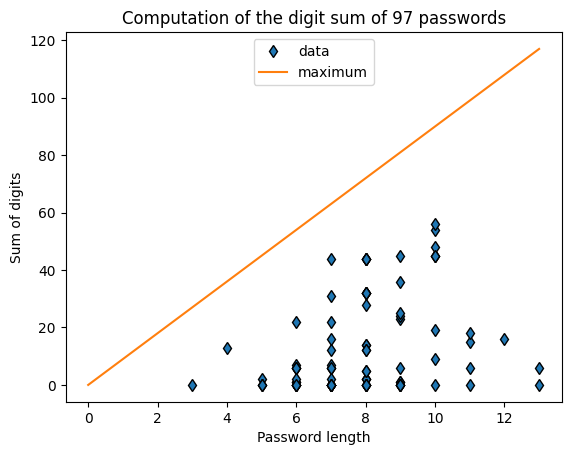

In [76]:
# plot the digit_sums as a function of the lengths with diamond markers with a black edge, the label is just "data"
plt.plot(lengths, digit_sums, "d", markeredgewidth=1, markeredgecolor="k", label="data")
# plot the maximum possible digit sum as a function of the length with the label "maximum", the x-values are automatically correct
plt.plot(9*np.arange(np.max(lengths) + 1), label="maximum")
# assign the usual labels to the axes
plt.xlabel("Password length")
plt.ylabel("Sum of digits")
# include the number of passwords in the dataset in the title
plt.title(f"Computation of the digit sum of {len(passwords)} passwords")
# display the legend in the upper center of the plot
plt.legend(loc="upper center")

## Counting characters
In this exercise you are going to count the characters of all passwords you have read from the file in a single dictionary. As a reminder, the count of a character tells you how often this character appeared in the passwords of your dataset. If you have the following list of passwords:
```
passwords = ["abc", "dac", "bba"]
```
the dictionary where the characters are counted should be `{"a": 3, "b": 3", "c": 2, "d": 1}`.

- Start with an empty dictionary to store the character counts. As before, a character should only appear in the dictionary if it has a count of at least 1.
- Iterate over the passwords and then iterate over the characters of each password in two (stacked) `for` loops. Count the characters in the dictionary as you did for the single password in the previous notebook.
- Use the built-in function `max()` to get the maximum value from the dictionary. Iterate over the dictionary to find the key that corresponds to the maximum value.
- Visualize the character counts in a bar plot. Label the axes and pick a descriptive title.
- Create three new dictionaries to separate the counts of the alphabetic characters, the numeric characters and the special characters. Create a bar plot for each one and label it accordingly.

In [77]:
# start with an empty dictionary and iterate over the characters
character_count = {}
for password in passwords:
    for character in password:
        # add 1 to the count if the key already exists or add the key with the value to the dictionary
        if character in character_count:
            character_count[character] += 1
        else:
            character_count[character] = 1

# the keys are ordered by the first occurrence of the character in the password
character_count

{'l': 25,
 'f': 11,
 'c': 12,
 'L': 2,
 'F': 1,
 '8': 39,
 '7': 12,
 '0': 36,
 '2': 31,
 '6': 24,
 '1': 61,
 '3': 32,
 'a': 45,
 'b': 10,
 '@': 1,
 't': 26,
 'e': 38,
 'h': 13,
 '-': 14,
 'n': 30,
 's': 20,
 'w': 6,
 'r': 35,
 'x': 2,
 '5': 25,
 'u': 8,
 '9': 27,
 'o': 26,
 'y': 9,
 'm': 14,
 '4': 29,
 'i': 22,
 'd': 20,
 'p': 8,
 '.': 2,
 'A': 2,
 'q': 6,
 'k': 10,
 'v': 7,
 'g': 11,
 'j': 6,
 'z': 2,
 ':': 1}

In [78]:
# the maximum count is 61
max_count = max(character_count.values())

In [79]:
# the maximum count corresponds to the key '1'
for key, value in character_count.items():
    if value == max_count:
        print(f"The key '{key}' has the maximum count of {max_count}")

The key '1' has the maximum count of 61


Text(0.5, 1.0, 'Character counts of 97 passwords')

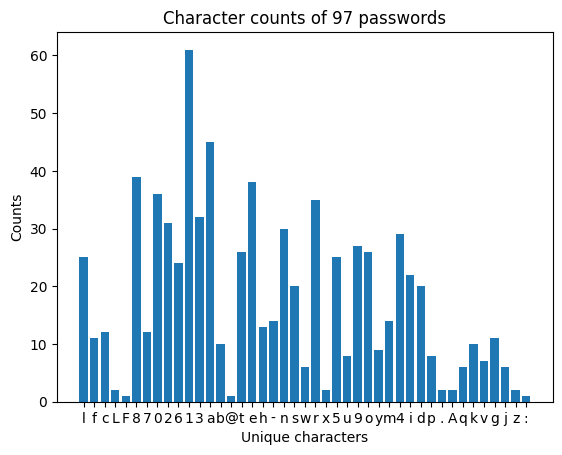

In [80]:
# use the keys as the x-data and the values as the y-data
plt.bar(character_count.keys(), character_count.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Character counts of {len(passwords)} passwords")

In [81]:
# create three empty dictionaries
alphabetic_counts = {}
numeric_counts = {}
special_counts = {}

# iterate over the character_count items
for key, value in character_count.items():
    # run the categorization on the keys and assign the key-value pairs to the respective dictionaries
    if key.isalpha():
        alphabetic_counts[key] = value
    elif key.isnumeric():
        numeric_counts[key] = value
    else:
        special_counts[key] = value

Text(0.5, 1.0, 'Alphabetic character counts of 97 passwords')

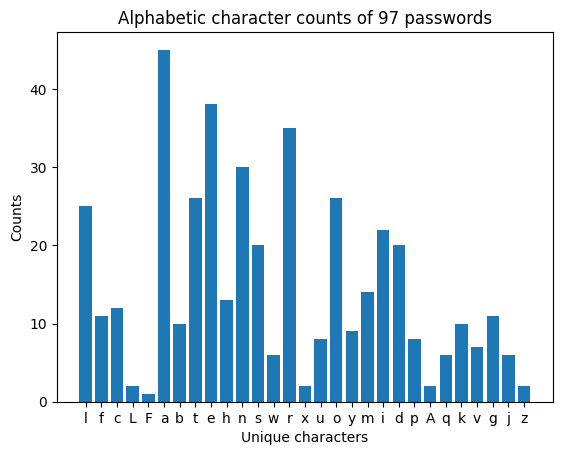

In [82]:
plt.bar(alphabetic_counts.keys(), alphabetic_counts.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Alphabetic character counts of {len(passwords)} passwords")

Text(0.5, 1.0, 'Numeric character counts of 97 passwords')

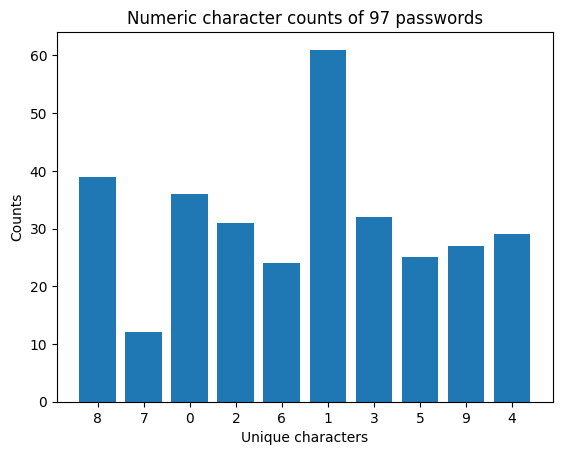

In [83]:
plt.bar(numeric_counts.keys(), numeric_counts.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Numeric character counts of {len(passwords)} passwords")

Text(0.5, 1.0, 'Special character counts of 97 passwords')

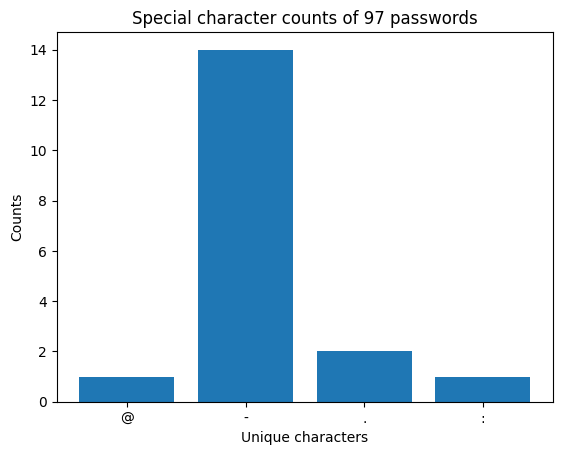

In [84]:
plt.bar(special_counts.keys(), special_counts.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Special character counts of {len(passwords)} passwords")

## EXTRA: Sorting the character counts
The plots in the previous exercise look a bit messy since the character count data is not ordered in any reasonable way. Due to the iteration over the passwords and the characters, the characters are currently just ordered by their first occurrence in the password dataset. For all three categories it would be nice to sort the values in descending order such that the characters are ordered by their frequencies from left to right in the plot. Alternatively, you could also sort the alphabetic data by the keys in alphabetic order (meaning "A" to "Z"), and you could sort the numeric data by the keys in numeric order (meaning "0" to "9").  

There are two options to approach the sorting. You can either use the native Python function `sorted()` or you can make use of the NumPy package and the functions `np.sort()` and `np.argsort()`. If you want to try the former option, read the section on using the `key` parameter in the `sorted()` function [here](https://realpython.com/sort-python-dictionary/#using-the-key-parameter-and-lambda-functions). If you want to use the NumPy approach, just read the remaining instructions in this cell.  

Even though NumPy is optimized for numerical data, the sorting functions also work for string data. If you sort an array of strings, it is ordered alphabetically from "A" to "Z" based on the first character in each string. Even though this might sound a bit complicated, this approach is used whenever strings have to be sorted, for example books in a library. The catch here is that you have to sort the keys together with the values, but to use the NumPy functions you need to separate the keys and values into two arrays. Note that you cannot directly create arrays from the dictionary keys and dictionary values, you have to pass them to the built-in function `list()` before turning them into an array:
```python
keys = np.array(list(alphabetic_counts.keys()))
values = np.array(list(alphabetic_counts.values()))
```
The function `np.sort()` can sort the arrays individually but if you want to keep the arrays aligned during the sorting, you have to use the function `np.argsort()`. Instead of the sorted array, this function will return indices that you can use to sort both arrays (the keys and the values).

- Start with the alphabetic character counts, sort them by their keys and show the sorted data in a bar plot. Use either of the two options mentioned above.
- Sort the numeric character counts by the keys and by the values. Display your results in two different plots.
- Sort the three dictionaries individually by their values and merge the data again. You can then display the three categories in a single plot.